In [11]:
file_path = "examples/fdia/epsilon_0.025/class_0/results/auto/summary_verify_fdia_ffnn_pytorch 50 100.npz"
file_path_cls_1 = "examples/fdia/epsilon_0.025/class_1/results/auto/summary_verify_fdia_ffnn_pytorch 50 100.npz"

In [12]:
import numpy as np

class_0_ret = np.load(file_path)
class_1_ret = np.load(file_path_cls_1)

In [13]:
print(class_0_ret['results'])
print(class_0_ret['times'])

[1 0 0 2 0 2 0 0 1 1 1 1 0 0 1 0 1 0 1 0]
[1.60864880e-02 3.71461156e+01 1.58153479e-02 6.00043202e+01
 1.70762951e-02 6.00076746e+01 4.36344032e-01 2.10411448e-02
 3.79784801e-03 3.81857692e-03 3.73949809e-03 1.07670178e+01
 2.76675860e-02 1.49903730e-02 3.72622511e-03 3.39802811e-02
 3.59057495e-03 1.02290035e-01 5.23331715e-03 3.26701188e-01]


In [14]:
# Convert results and times to numpy arrays for summary calculations
results_array = class_0_ret['results']
times_array = class_0_ret['times']
N = len(results_array)  # Total number of samples

# Calculate summary statistics
totalTime = times_array.sum()
avgTime = totalTime / N if N > 0 else 0

robust_samples = np.count_nonzero(results_array == 1)
not_robust_samples = np.count_nonzero(results_array == 0)
unknown_samples = np.count_nonzero(results_array == 2)

# Print results to the screen
print("======= ROBUSTNESS RESULTS ==========")
print(f"Number of robust samples = {robust_samples}, equivalent to {100 * robust_samples / N:.2f}% of the samples.")
print(f"Number of not robust samples = {not_robust_samples}, equivalent to {100 * not_robust_samples / N:.2f}% of the samples.")
print(f"Number of unknown samples = {unknown_samples}, equivalent to {100 * unknown_samples / N:.2f}% of the samples.")
print(f"It took a total of {totalTime:.2f} seconds to compute the verification results, an average of {avgTime:.2f} seconds per image")

======= ROBUSTNESS RESULTS ==========
Number of robust samples = 8, equivalent to 40.00% of the samples.
Number of not robust samples = 10, equivalent to 50.00% of the samples.
Number of unknown samples = 2, equivalent to 10.00% of the samples.
It took a total of 168.96 seconds to compute the verification results, an average of 8.45 seconds per image


In [15]:
# Convert results and times to numpy arrays for summary calculations
results_array = class_1_ret['results']
times_array = class_1_ret['times']
N = len(results_array)  # Total number of samples

# Calculate summary statistics
totalTime = times_array.sum()
avgTime = totalTime / N if N > 0 else 0

robust_samples = np.count_nonzero(results_array == 1)
not_robust_samples = np.count_nonzero(results_array == 0)
unknown_samples = np.count_nonzero(results_array == 2)

# Print results to the screen
print("======= ROBUSTNESS RESULTS ==========")
print(f"Number of robust samples = {robust_samples}, equivalent to {100 * robust_samples / N:.2f}% of the samples.")
print(f"Number of not robust samples = {not_robust_samples}, equivalent to {100 * not_robust_samples / N:.2f}% of the samples.")
print(f"Number of unknown samples = {unknown_samples}, equivalent to {100 * unknown_samples / N:.2f}% of the samples.")
print(f"It took a total of {totalTime:.2f} seconds to compute the verification results, an average of {avgTime:.2f} seconds per image")

======= ROBUSTNESS RESULTS ==========
Number of robust samples = 2, equivalent to 10.00% of the samples.
Number of not robust samples = 16, equivalent to 80.00% of the samples.
Number of unknown samples = 2, equivalent to 10.00% of the samples.
It took a total of 289.85 seconds to compute the verification results, an average of 14.49 seconds per image


In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# data = np.from_csv()
data = pd.read_csv("verification_result.csv")
nnv_result = data.loc[data['tool'] == 'nnv']
nnenum_result = data.loc[data['tool'] == 'nnenum']
# Plot the average time
# plt.figure(figsize=(10, 6))
# plt.plot(data['epsilon'][0:9], data['avg_time'][0:9], color='blue', linestyle='-', label='nnv')
# plt.plot(data['epsilon'][9:], data['avg_time'][9:], color='orange', linestyle='--', label='nnenum')
# plt.xlabel('Epsilon')
# plt.ylabel('Average Time (s)')
# plt.title('Average Time')
# plt.legend()
# plt.grid()
# plt.show()

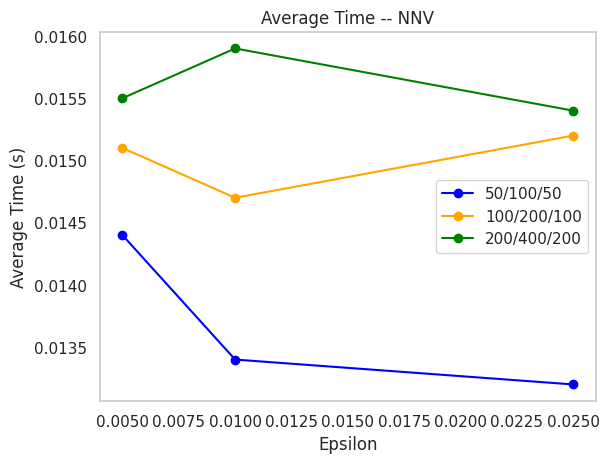

In [17]:
nnv_result
# Plot the average time
# Create a unique color for each model
model_colors = {'50/100/50': 'blue', '100/200/100': 'orange', '200/400/200': 'green'}

# Plot the average time for each model
for model in nnv_result['model'].unique():
    model_data = nnv_result[nnv_result['model'] == model]
    plt.plot(model_data['epsilon'], model_data['AVG time (s)'], color=model_colors[model], marker='o', linestyle='-', label=model)

plt.xlabel('Epsilon')
plt.ylabel('Average Time (s)')
plt.title('Average Time -- NNV')
plt.legend()
plt.grid()
plt.show()

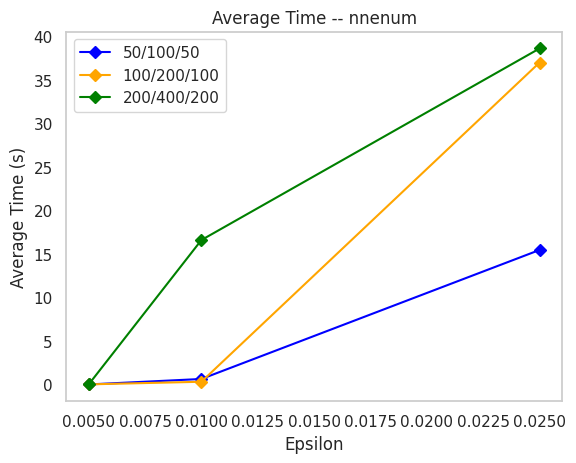

In [18]:
# nnv_result = nnenum_result
# Plot the average time
# Create a unique color for each model
model_colors = {'50/100/50': 'blue', '100/200/100': 'orange', '200/400/200': 'green'}

# Plot the average time for each model
for model in nnenum_result['model'].unique():
    model_data = nnenum_result[nnenum_result['model'] == model]
    plt.plot(model_data['epsilon'], model_data['AVG time (s)'], color=model_colors[model], marker='D', linestyle='-', label=model)

plt.xlabel('Epsilon')
plt.ylabel('Average Time (s)')
plt.title('Average Time -- nnenum')
plt.legend()
plt.grid()
plt.show()

In [19]:
nnv_result

,model,tool,epsilon,Robust,Non-robust,AVG time (s)
9,50/100/50,nnv,0.005,0.76515,0.23485,0.0144
10,50/100/50,nnv,0.010,0.76623,0.23377,0.0134
11,50/100/50,nnv,0.025,0.76840,0.23160,0.0132
12,100/200/100,nnv,0.005,0.66667,0.33333,0.0151
13,100/200/100,nnv,0.010,0.66775,0.33225,0.0147
14,100/200/100,nnv,0.025,0.66667,0.33333,0.0152
15,200/400/200,nnv,0.005,0.49134,0.50866,0.0155
16,200/400/200,nnv,0.010,0.49026,0.50974,0.0159
17,200/400/200,nnv,0.025,0.48701,0.51299,0.0154


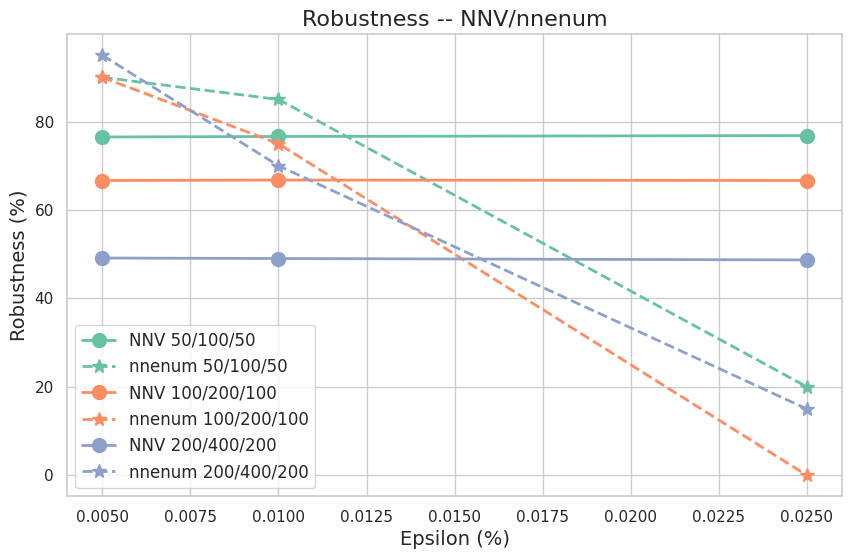

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the Seaborn theme
sns.set_theme(style="whitegrid", palette="Set2")

# Assuming you have the data in DataFrames called 'nnv_result' and 'nnenum_result'
plt.figure(figsize=(10, 6))

for model in nnv_result['model'].unique():
    model_data = nnv_result[nnv_result['model'] == model]
    model_data_2 = nnenum_result[nnenum_result['model'] == model]
    
    # Use Seaborn's "colorblind" palette to get more distinguishable colors
    color = sns.color_palette("Set2")[list(nnv_result['model'].unique()).index(model)]
    
    plt.plot(model_data['epsilon'], model_data['Robust']*100.0, color=color, marker='o', markersize=10, linewidth=2, linestyle='-', label=f"NNV {model}")
    plt.plot(model_data_2['epsilon'], model_data_2['Robust']*100.0, color=color, marker='*', markersize=10, linewidth=2, linestyle='--', label=f"nnenum {model}")

plt.xlabel('Epsilon (%)', fontsize=14)
plt.ylabel('Robustness (%)', fontsize=14)
plt.title('Robustness -- NNV/nnenum', fontsize=16)
plt.legend(fontsize=12)
plt.grid(linewidth=1)
plt.show()